In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

In [2]:
from sklearn.cluster import KMeans

In [3]:
# CLIMATE DAU 
partida_dau = pd.read_csv("dades/dades_csv/climatedau/game_partida.csv", delimiter=',' , encoding="latin-1")
ronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_ronda.csv", delimiter=',' , encoding="latin-1")
user_dau = pd.read_csv("dades/dades_csv/climatedau/game_user.csv", delimiter=',' , encoding="latin-1")

user_dau.drop(user_dau.index[3], inplace=True)
userronda_dau = pd.read_csv("dades/dades_csv/climatedau/game_userronda.csv", delimiter=',' , encoding="latin-1")

eq_user_dau = pd.read_csv("dades/eq_user_dau.csv", delimiter=',' , encoding="latin-1")
ineq_user_dau = user_dau[~user_dau.user_id.isin(eq_user_dau['user_id'])]

# CLIMATE STREET 
partida_street = pd.read_csv("dades/dades_csv/climatestreet/game_partida_street.csv", delimiter=',' , encoding="latin-1")
ronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_ronda_street.csv", delimiter=',' , encoding="latin-1")
user_street = pd.read_csv("dades/dades_csv/climatestreet/game_user_street.csv", delimiter=',' , encoding="latin-1")
user_street.drop(user_street[user_street['diners_inicials']== 0].index, inplace=True)
userronda_street = pd.read_csv("dades/dades_csv/climatestreet/game_userronda_street.csv", delimiter=',' , encoding="latin-1")

# CLIMATE VIL
partida_vil = pd.read_csv("dades/dadesvil/partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil = pd.read_csv("dades/dadesvil/ronda.csv", delimiter=',' , encoding="latin-1")
user_vil = pd.read_csv("dades/dadesvil/user.csv", delimiter=',' , encoding="latin-1")
user_vil.drop(user_vil[user_vil['diners_inicials']== 0].index, inplace=True)
userronda_vil = pd.read_csv("dades/dadesvil/userronda.csv", delimiter=',' , encoding="latin-1")

user_street.rename(columns={'id': 'user_id'}, inplace=True)
user_vil.rename(columns={'id': 'user_id'}, inplace=True)

In [4]:
user_het=pd.concat([ineq_user_dau.loc[:,['user_id','diners_inicials']],user_street.loc[:,['user_id','diners_inicials']]])
user_hom=pd.concat([eq_user_dau.loc[:,['user_id','diners_inicials']],user_vil.loc[:,['user_id','diners_inicials']]])

In [5]:
def contribution_round(user, userronda, norm):
    tonorm = user[['user_id','diners_inicials']]
    tocontr = pd.merge(userronda,tonorm, on = 'user_id')
    #Normalization
    tocontr['selnorm'] = (tocontr['seleccio']/tocontr['diners_inicials'])*10
    rondes = np.arange(1,11)
    ronda_id = np.tile(rondes,len(np.unique(userronda['user_id']))) #324 users
    tocontr['ronda_id'] = ronda_id
    contr_round = pd.pivot(index = tocontr['user_id'], columns = tocontr['ronda_id'], values = tocontr[norm])
    return contr_round

In [6]:
# Normalized contributions per round
## DAU
contr_dau_norm = contribution_round(user_dau,userronda_dau, 'selnorm')
contr_dau = contribution_round(user_dau,userronda_dau, 'seleccio')

## DAU eq: 
eq_dau = pd.read_csv("dades/eq_dau.csv", delimiter=',' , encoding="latin-1")
eq_contr_dau = eq_dau.iloc[:,2:12]
eq_contr_dau = eq_contr_dau.set_index(eq_user_dau.user_id)
eq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(eq_dau['user_id'])]
namesList = [np.linspace(1,10,10,dtype=int)]
eq_contr_dau.columns = namesList
eq_contr_dau_norm.columns = namesList

## DAU ineq:
ineq_dau = pd.read_csv("dades/ineq_dau.csv", delimiter=',' , encoding="latin-1")
ineq_contr_dau = ineq_dau.iloc[:,2:12]
ineq_contr_dau = ineq_contr_dau.set_index(ineq_user_dau.user_id)
ineq_contr_dau_norm = contr_dau_norm[contr_dau_norm.index.isin(ineq_dau['user_id'])]
ineq_contr_dau.columns = namesList
ineq_contr_dau_norm.columns = namesList

## STREET
contr_street_norm = contribution_round(user_street,userronda_street, 'selnorm')
contr_street = contribution_round(user_street,userronda_street, 'seleccio')

## VIL
contr_vil_norm = contribution_round(user_vil,userronda_vil, 'selnorm')
contr_vil = contribution_round(user_vil,userronda_vil, 'seleccio')

In [7]:
### Ronda 0: 
ronda_dau0 = pd.read_csv("dades/ronda_dau_0.csv", delimiter=',' , encoding="latin-1")
ronda_street0 = pd.read_csv("dades/ronda_street_0.csv", delimiter=',' , encoding="latin-1")
ronda_vil0 = pd.read_csv("dades/ronda_vil_0.csv", delimiter=',' , encoding="latin-1")

In [8]:
daur = pd.read_csv("dades/dau_r.csv", delimiter=',' , encoding="latin-1")
streetr = pd.read_csv("dades/street_r.csv", delimiter=',' , encoding="latin-1")
vilr = pd.read_csv("dades/vil_r.csv", delimiter=',' , encoding="latin-1")

In [9]:
def dataset_2(ds_r,user_ds):
    table1 = ds_r[['user_id','partida_id','mean_contr']]
    table2 = user_ds[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                     'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13','prfinal14','prfinal15']]
    ds_2 = table1.merge(table2, on = 'user_id')
    ds_2['genere'] =ds_2['genere'].map({'d': 1, 'h': 0})
    ds_2['prfinal1'] =ds_2['prfinal1'].map({'r1': 1, 'r2': 2, 'r3':3, 'nan':0})
    ds_2['prfinal2'] =ds_2['prfinal2'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal3'] =ds_2['prfinal3'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal4'] =ds_2['prfinal4'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal5'] =ds_2['prfinal5'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal6'] =ds_2['prfinal6'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal7'] =ds_2['prfinal7'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal8'] =ds_2['prfinal8'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal9'] =ds_2['prfinal9'].map({'r1': 1, 'r2': 2, 'r3':3,'nan':0})
    ds_2['prfinal10'] =ds_2['prfinal10'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal11'] =ds_2['prfinal11'].map({'r1': 1, 'r4': 3, 'r3':2,'nan':0})
    ds_2['prfinal12'] =ds_2['prfinal12'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal13'] =ds_2['prfinal13'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal14'] =ds_2['prfinal14'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    ds_2['prfinal15'] =ds_2['prfinal15'].map({'r1': 1, 'r2': 2, 'r3':3, 'r4':4,'nan':0})
    return(ds_2)

In [10]:
ds_2_dau = dataset_2(daur,user_dau)
ds_2_street = dataset_2(streetr,user_street)

user_vil.rename(columns={'enquesta_final_pr1': 'prfinal1', 'enquesta_final_pr2': 'prfinal2','enquesta_final_pr3': 'prfinal3',
                        'enquesta_final_pr4': 'prfinal4','enquesta_final_pr5': 'prfinal5','enquesta_final_pr6': 'prfinal6',
                        'enquesta_final_pr7': 'prfinal7','enquesta_final_pr8': 'prfinal8','enquesta_final_pr9': 'prfinal9',
                        'enquesta_final_pr10': 'prfinal10','enquesta_final_pr11': 'prfinal11','enquesta_final_pr12': 'prfinal12',
                        'enquesta_final_pr13': 'prfinal13',}, inplace=True)

table1 = vilr[['user_id','partida_id','mean_contr']]
table2 = user_vil[['user_id', 'genere', 'rang_edat','prfinal1','prfinal2','prfinal3','prfinal4','prfinal5','prfinal6',
                 'prfinal7','prfinal8','prfinal9','prfinal10','prfinal11','prfinal12','prfinal13']]
ds_2_vil = table1.merge(table2, on = 'user_id')
ds_2_vil['genere'] =ds_2_vil['genere'].map({'F': 1, 'M': 0})

#create new df 
final_dau = pd.DataFrame({'ronda_obj':ronda_dau0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_dau0['partida_id'])})

final_street = pd.DataFrame({'ronda_obj':ronda_street0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_street0['partida_id'])})

final_vil = pd.DataFrame({'ronda_obj':ronda_vil0.groupby('partida_id').last()['num_ronda'],
                            'partida_id':np.unique(ronda_vil0['partida_id'])})
#print (df)

ronda_dau_data = pd.read_csv("dades/ronda_dau_partida.csv", delimiter=',' , encoding="latin-1")
ronda_street_data = pd.read_csv("dades/ronda_street_partida.csv", delimiter=',' , encoding="latin-1")
ronda_vil_data = pd.read_csv("dades/ronda_vil_partida.csv", delimiter=',' , encoding="latin-1")

partides_info_dau = ronda_dau_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_street = ronda_street_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")
partides_info_vil = ronda_vil_data.pivot(index='partida_id', columns='num_ronda', values= "bucket")

#ineq_contr_dau_norm.to_csv('dades/ineq_contr_dau_norm.csv', sep=',')
#eq_contr_dau_norm.to_csv('dades/eq_contr_dau_norm.csv', sep=',')
#contr_street_norm.to_csv('dades/contr_street_norm.csv', sep=',')
#contr_vil_norm.to_csv('dades/contr_vil_norm.csv', sep=',')

In [11]:
ineq_contr_dau_2= ineq_contr_dau.assign(experiment='het_dau')
contr_street_2= contr_street.assign(experiment='street')
frames_het = [ineq_contr_dau_2, contr_street_2]
heterogeneous = pd.concat(frames_het)

eq_contr_dau_2= eq_contr_dau.assign(experiment='hom_dau')
contr_vil_2= contr_vil.assign(experiment='vil')
frames_hom = [eq_contr_dau_2, contr_vil_2]
homogeneous = pd.concat(frames_hom)

In [12]:
ineq_contr_dau_2= ineq_contr_dau_norm.assign(experiment='het_dau')
contr_street_2= contr_street_norm.assign(experiment='street')
frames_het = [ineq_contr_dau_2, contr_street_2]
heterogeneous_norm = pd.concat(frames_het)

eq_contr_dau_2= eq_contr_dau_norm.assign(experiment='hom_dau')
contr_vil_2= contr_vil_norm.assign(experiment='vil')
frames_hom = [eq_contr_dau_2, contr_vil_2]
homogeneous_norm = pd.concat(frames_hom)

In [13]:
#Standarized data:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# load the Iris dataset

# separate the data and target attributes
X = contr_street
# standardize the data attributes
X_stand = preprocessing.scale(X)
X_stand=pd.DataFrame(X_stand,index = contr_street.index, columns = contr_street.columns)

In [14]:
## Took from: https://stackoverflow.com/questions/35611465/python-scikit-learn-clustering-with-missing-data

import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):
    """Perform K-Means clustering on data with missing values.

    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            # initialize KMeans with the previous set of centroids. this is much
            # faster and makes it easier to check convergence (since labels
            # won't be permuted on every iteration), but might be more prone to
            # getting stuck in local minima.
            cls = KMeans(n_clusters, init=prev_centroids, random_state=0)
        else:
            # do multiple random initializations in parallel
            cls = KMeans(n_clusters, n_jobs=-1, random_state=0)

        # perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

In [15]:
def ending_game(final_ds,contr_ds,user_ds,ending_pos,name_ds):
    final = final_ds[final_ds.ronda_obj==ending_pos]
    mean_contr_ds= contr_ds.mean(axis=0)
    x = np.linspace(1, 10, 10)
    list_contr=[]
    for i in final.partida_id.unique():
        game_contr = contr_ds.loc[list(user_ds[user_ds.partida_id==i].user_id),:]
        mean_contr_game = game_contr.describe().loc['mean',:]
        list_contr.append([i,game_contr])
    return(list_contr)

In [16]:
def final_table(final_ds, contr_ds, user_ds, name_ds):
    list1=[]
    for j in [7,8,9,10]:
        end= ending_game(final_ds, contr_ds, user_ds, j,name_ds)
        for i in range(len(end)):
            contr_g = end[i][1].iloc[:,(10-j):]
            list1.append(contr_g)
    frames = [i for i in list1]
    table = pd.concat(frames)
    return(table)

In [17]:
table_street = final_table(final_street,contr_street_norm, user_street, 'Street')
table_vil = final_table(final_vil,contr_vil_norm, user_vil, 'Vil')
table_eq_dau = final_table(final_dau[final_dau.index.isin(eq_user_dau.partida_id)],eq_contr_dau_norm, eq_user_dau, 'Homogeneous DAU')
table_ineq_dau = final_table(final_dau[final_dau.index.isin(ineq_user_dau.partida_id)],ineq_contr_dau_norm, ineq_user_dau, 'Heterogeneous DAU')

table_het = pd.concat([table_ineq_dau, table_street])
table_hom = pd.concat([table_eq_dau, table_vil])

#### Heterogeneous K-Means:

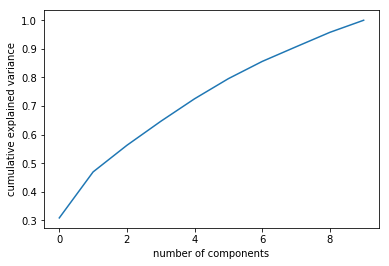

In [18]:
X = heterogeneous.iloc[:,:10]
pca = sklearnPCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


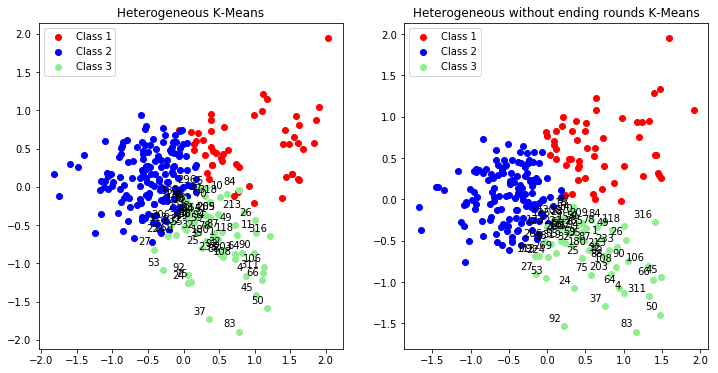

In [19]:
X = table_het
n_clusters = 3
labels, centroids, X_hat = kmeans_missing(X,n_clusters, max_iter=10)

X_hat = pd.DataFrame(X_hat, index = X.index )
### PCA: 
### Unsupervised clustering (K-MEANS)

X = heterogeneous_norm.iloc[:,:10]
k_means = KMeans(n_clusters=n_clusters, random_state=0, n_init = 30).fit(X)
clustcoef_het = k_means.labels_
y_het = clustcoef_het
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X),index = X.index)

X_0 = X_hat
k_means_0 = KMeans(n_clusters=n_clusters, random_state=0, n_init = 30).fit(X_0)
clustcoef_0_het = k_means_0.labels_
y_0_het = clustcoef_0_het
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed_0 = pd.DataFrame(pca.fit_transform(X_0), index = X_0.index)


plt.figure(figsize=(12,6))
plt.subplot(121, title='Heterogeneous K-Means')
plt.scatter(transformed[y_het==0][0], transformed[y_het==0][1], label='Class 1', c='red')
plt.scatter(transformed[y_het==1][0], transformed[y_het==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y_het==2][0], transformed[y_het==2][1], label='Class 3', c='lightgreen')
for label, x, y in zip(transformed[y_het==2].index,transformed[y_het==2][ 0], transformed[y_het==2][1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.legend()
plt.subplot(122, title='Heterogeneous without ending rounds K-Means')
plt.scatter(transformed_0[y_0_het==0][0], transformed_0[y_0_het==0][1], label='Class 1', c='red')
plt.scatter(transformed_0[y_0_het==2][0], transformed_0[y_0_het==2][1], label='Class 2', c='blue')
plt.scatter(transformed_0[y_0_het==1][0], transformed_0[y_0_het==1][1], label='Class 3', c='lightgreen')
for label, x, y in zip(transformed_0[y_0_het==1].index,transformed_0[y_0_het==1][ 0], transformed_0[y_0_het==1][1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.legend()
plt.show()

#### Homogeneous K-Means:

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


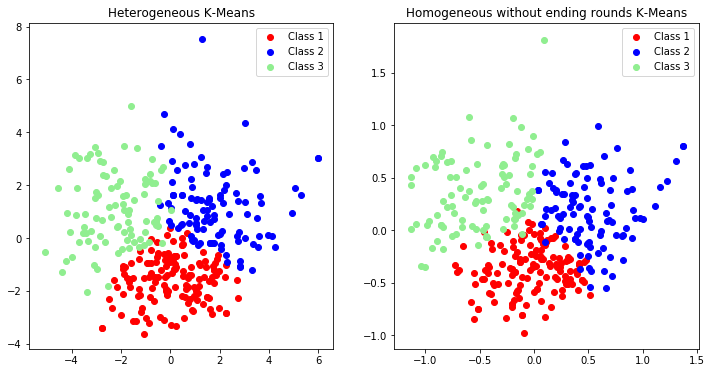

In [52]:
X = table_hom
n_clusters = 3
labels, centroids, X_hat = kmeans_missing(X,n_clusters, max_iter=10)

X_hat = pd.DataFrame(X_hat, index = X.index )
### PCA: 
### Unsupervised clustering (K-MEANS)

X = homogeneous.iloc[:,:10]
k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
clustcoef_hom = k_means.labels_
y_hom = clustcoef_hom
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X),index = X.index)

X_0 = X_hat
k_means_0 = KMeans(n_clusters=n_clusters, random_state=0).fit(X_0)
clustcoef_0_hom = k_means_0.labels_
y_0_hom = clustcoef_0_hom
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed_0 = pd.DataFrame(pca.fit_transform(X_0), index = X_0.index)


plt.figure(figsize=(12,6))
plt.subplot(121, title='Heterogeneous K-Means')
plt.scatter(transformed[y_hom==0][0], transformed[y_hom==0][1], label='Class 1', c='red')
plt.scatter(transformed[y_hom==1][0], transformed[y_hom==1][1], label='Class 2', c='blue')
plt.scatter(transformed[y_hom==2][0], transformed[y_hom==2][1], label='Class 3', c='lightgreen')
#for label, x, y in zip(transformed[y==0].index,transformed[y==0][ 0], transformed[y==0][1]):  
#    plt.annotate(
#        label,
#        xy=(x, y), xytext=(-3, 3),
#        textcoords='offset points', ha='right', va='bottom')
plt.legend()
plt.subplot(122, title='Homogeneous without ending rounds K-Means')
plt.scatter(transformed_0[y_0_hom==0][0], transformed_0[y_0_hom==0][1], label='Class 1', c='red')
plt.scatter(transformed_0[y_0_hom==1][0], transformed_0[y_0_hom==1][1], label='Class 2', c='blue')
plt.scatter(transformed_0[y_0_hom==2][0], transformed_0[y_0_hom==2][1], label='Class 3', c='lightgreen')
#for label, x, y in zip(transformed_0[y_0==0].index,transformed_0[y_0==0][ 0], transformed_0[y_0==0][1]):  
#    plt.annotate(
#        label,
#        xy=(x, y), xytext=(-3, 3),
#        textcoords='offset points', ha='right', va='bottom')
plt.legend()
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


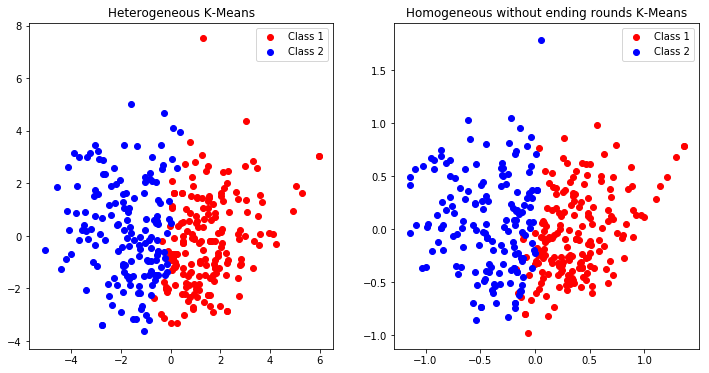

In [56]:
X = table_hom
n_clusters = 2
labels, centroids, X_hat = kmeans_missing(X,n_clusters, max_iter=10)

X_hat = pd.DataFrame(X_hat, index = X.index )
### PCA: 
### Unsupervised clustering (K-MEANS)

X = homogeneous.iloc[:,:10]
k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
clustcoef_hom = k_means.labels_
y_hom2 = clustcoef_hom
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X),index = X.index)

X_0 = X_hat
k_means_0 = KMeans(n_clusters=n_clusters, random_state=0).fit(X_0)
clustcoef_0_hom = k_means_0.labels_
y_0_hom2 = clustcoef_0_hom
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed_0 = pd.DataFrame(pca.fit_transform(X_0), index = X_0.index)


plt.figure(figsize=(12,6))
plt.subplot(121, title='Heterogeneous K-Means')
plt.scatter(transformed[y_hom2==0][0], transformed[y_hom2==0][1], label='Class 1', c='red')
plt.scatter(transformed[y_hom2==1][0], transformed[y_hom2==1][1], label='Class 2', c='blue')
#plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 3', c='lightgreen')
#for label, x, y in zip(transformed[y==1].index,transformed[y==1][ 0], transformed[y==1][1]):  
#    plt.annotate(
#        label,
#        xy=(x, y), xytext=(-3, 3),
#        textcoords='offset points', ha='right', va='bottom')
plt.legend()
plt.subplot(122, title='Homogeneous without ending rounds K-Means')
plt.scatter(transformed_0[y_0_hom2==1][0], transformed_0[y_0_hom2==1][1], label='Class 1', c='red')
plt.scatter(transformed_0[y_0_hom2==0][0], transformed_0[y_0_hom2==0][1], label='Class 2', c='blue')
#plt.scatter(transformed_0[y_0==2][0], transformed_0[y_0==2][1], label='Class 3', c='lightgreen')
#for label, x, y in zip(transformed_0[y_0==1].index,transformed_0[y_0==1][ 0], transformed_0[y_0==1][1]):  
#    plt.annotate(
#        label,
#        xy=(x, y), xytext=(-3, 3),
#        textcoords='offset points', ha='right', va='bottom')
plt.legend()
plt.show()

In [ ]:
heterogeneous['clust_coef'] = clustcoef_het

### Identification of clusters: 

In [23]:
def label_saving_4 (row,category):
    if row[category] < 0.250 :
        return 0
    if row[category] >= 0.250 and row[category] < 0.500:
        return 1
    if row[category] >= 0.500 and row[category] < 0.750 :
        return 2
    else:
        return 3

In [24]:
def categories (contr_ds,user_ds):
    category_ds = user_ds.loc[:,["user_id","diners_inicials",'partida_id']]
    category_ds.set_index('user_id', inplace=True)
    category_ds['contr_total']=contr_ds.sum(axis=1)
    category_ds['mean_contr']=contr_ds.mean(axis=1)
    category_ds['contr/budget']= (category_ds.contr_total)/ category_ds.diners_inicials
    category_ds['category4']=category_ds.apply (lambda row: label_saving_4 (row,'contr/budget'),axis=1) 
    return category_ds

In [25]:
def categories_norm (contr_ds,user_ds):
    category_ds = user_ds.loc[:,["user_id","diners_inicials",'partida_id']]
    category_ds.set_index('user_id', inplace=True)
    #category_ds= category_ds.reindex(category_ds.loc[:,'user_id'])
    category_ds['contr_total_norm']=contr_ds.sum(axis=1)
    return category_ds

In [26]:
category_ineq_dau = categories(ineq_contr_dau, ineq_user_dau)
category_eq_dau = categories(eq_contr_dau, eq_user_dau)
category_street = categories(contr_street,user_street)
category_vil = categories(contr_vil, user_vil)

In [27]:
cat_ineq_dau = categories_norm(ineq_contr_dau_norm, ineq_user_dau)
cat_eq_dau = categories_norm(eq_contr_dau_norm, eq_user_dau)
cat_street = categories_norm(contr_street_norm,user_street)
cat_vil = categories_norm(contr_vil_norm, user_vil)

In [28]:
categ_het=pd.concat([category_ineq_dau,category_street])
categ_hom=pd.concat([category_eq_dau,category_vil])

## Heterogeneous cluster identification:

In [32]:
X = heterogeneous_norm
clust1 = X.iloc[y_het == 0]
clust2 = X.iloc[y_het == 1]
clust3 = X.iloc[y_het == 2]

contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust1[clust1.experiment=='het_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust1[clust1.experiment=='street'].index)]
contr_het_1 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust1[clust1.experiment=='het_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust1[clust1.experiment=='street'].index)]
user_het_1 = pd.concat([user_1,user_2])

c1_het = categories(contr_het_1,user_het_1)

contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust2[clust2.experiment=='het_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust2[clust2.experiment=='street'].index)]
contr_het_2 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust2[clust2.experiment=='het_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust2[clust2.experiment=='street'].index)]
user_het_2 = pd.concat([user_1,user_2])

c2_het = categories(contr_het_2,user_het_2)

contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust3[clust3.experiment=='het_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust3[clust3.experiment=='street'].index)]
contr_het_3 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust3[clust3.experiment=='het_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust3[clust3.experiment=='street'].index)]
user_het_3 = pd.concat([user_1,user_2])

c3_het = categories(contr_het_3,user_het_3)

In [128]:
cat_c1_het = categories(contr_het,user_het, 'contr/budget')

In [ ]:
cat_c1_het

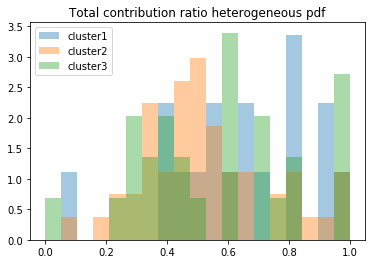

In [63]:
bins = np.linspace(0, 1, 20)

plt.hist(c1_het['contr/budget'], bins, alpha=0.4,density = True, label='cluster1')
plt.hist(c2_het['contr/budget'], bins, alpha=0.4,density = True, label='cluster2')
plt.hist(c3_het['contr/budget'], bins, alpha=0.4,density = True, label='cluster3')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
plt.legend(loc='upper left')
plt.title('Total contribution ratio heterogeneous pdf')
plt.show()

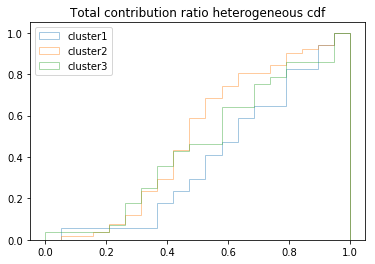

In [64]:
bins = np.linspace(0, 1, 20)

plt.hist(c1_het['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step',rwidth =50, label='cluster1')
plt.hist(c2_het['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step', label='cluster2')
plt.hist(c3_het['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step', label='cluster3')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
plt.legend(loc='upper left')
plt.title('Total contribution ratio heterogeneous cdf')
plt.show()

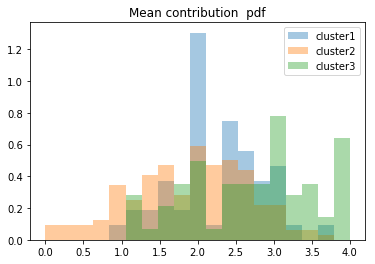

In [42]:
bins = np.linspace(0,4, 20)

plt.hist(c1_het['mean_contr'], bins, alpha=0.4,density = True, label='cluster1')
plt.hist(c2_het['mean_contr'], bins, alpha=0.4,density = True, label='cluster2')
plt.hist(c3_het['mean_contr'], bins, alpha=0.4,density = True, label='cluster3')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
plt.legend(loc='upper right')
plt.title('Mean contribution  pdf')
plt.show()

## Homogeneous cluster 

In [69]:
X = homogeneous_norm
clust1 = X.iloc[y_hom == 0]
clust2 = X.iloc[y_hom == 1]
clust3 = X.iloc[y_hom == 2]

contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust1[clust1.experiment=='hom_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust1[clust1.experiment=='vil'].index)]
contr_hom_1 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust1[clust1.experiment=='hom_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust1[clust1.experiment=='vil'].index)]
user_hom_1 = pd.concat([user_1,user_2])

c1_hom = categories(contr_hom_1,user_hom_1)

contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust2[clust2.experiment=='hom_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust2[clust2.experiment=='vil'].index)]
contr_hom_2 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust2[clust2.experiment=='hom_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust2[clust2.experiment=='vil'].index)]
user_hom_2 = pd.concat([user_1,user_2])

c2_hom = categories(contr_hom_2,user_hom_2)

contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust3[clust3.experiment=='hom_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust3[clust3.experiment=='vil'].index)]
contr_hom_3 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust3[clust3.experiment=='hom_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust3[clust3.experiment=='vil'].index)]
user_hom_3 = pd.concat([user_1,user_2])

c3_hom = categories(contr_hom_3,user_hom_3)

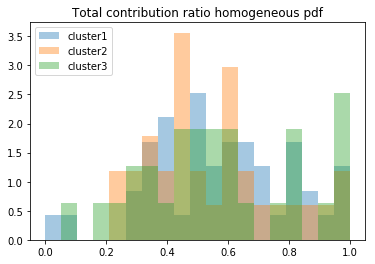

In [70]:
bins = np.linspace(0, 1, 20)

plt.hist(c1_hom['contr/budget'], bins, alpha=0.4,density = True, label='cluster1')
plt.hist(c2_hom['contr/budget'], bins, alpha=0.4,density = True, label='cluster2')
plt.hist(c3_hom['contr/budget'], bins, alpha=0.4,density = True, label='cluster3')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
plt.legend(loc='upper left')
plt.title('Total contribution ratio homogeneous pdf')
plt.show()

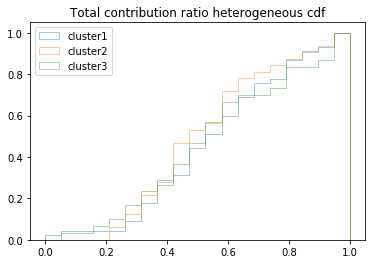

In [67]:
bins = np.linspace(0, 1, 20)

plt.hist(c1_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step',rwidth =50, label='cluster1')
plt.hist(c2_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step', label='cluster2')
plt.hist(c3_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step', label='cluster3')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
plt.legend(loc='upper left')
plt.title('Total contribution ratio homogeneous cdf')
plt.show()

In [71]:
X = homogeneous_norm
clust1 = X.iloc[y_hom2 == 0]
clust2 = X.iloc[y_hom2 == 1]


contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust1[clust1.experiment=='hom_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust1[clust1.experiment=='vil'].index)]
contr_hom_1 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust1[clust1.experiment=='hom_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust1[clust1.experiment=='vil'].index)]
user_hom_1 = pd.concat([user_1,user_2])

c1_hom = categories(contr_hom_1,user_hom_1)

contr_1 = ineq_contr_dau[ineq_contr_dau.index.isin(clust2[clust2.experiment=='hom_dau'].index)]
contr_2 = contr_street[contr_street.index.isin(clust2[clust2.experiment=='vil'].index)]
contr_hom_2 = pd.concat([contr_1,contr_2])

user_1 = ineq_user_dau[ineq_user_dau.user_id.isin(clust2[clust2.experiment=='hom_dau'].index)]
user_2 = user_street[user_street.user_id.isin(clust2[clust2.experiment=='vil'].index)]
user_hom_2 = pd.concat([user_1,user_2])

c2_hom = categories(contr_hom_2,user_hom_2)

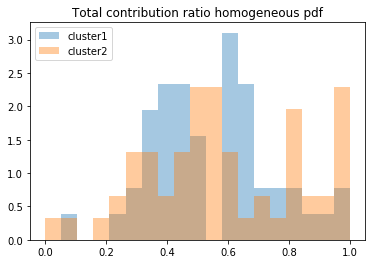

In [75]:
bins = np.linspace(0, 1, 20)

plt.hist(c1_hom['contr/budget'], bins, alpha=0.4,density = True, label='cluster1')
plt.hist(c2_hom['contr/budget'], bins, alpha=0.4,density = True, label='cluster2')
#plt.hist(c3_hom['contr/budget'], bins, alpha=0.4,density = True, label='cluster3')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
plt.legend(loc='upper left')
plt.title('Total contribution ratio homogeneous pdf')
plt.show()

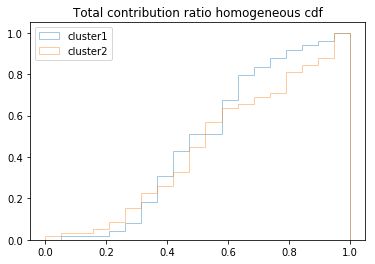

In [76]:
bins = np.linspace(0, 1, 20)

plt.hist(c1_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step',rwidth =50, label='cluster1')
plt.hist(c2_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step', label='cluster2')
#plt.hist(c3_hom['contr/budget'], bins, alpha=0.4,density = True, cumulative=True,histtype='step', label='cluster3')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
plt.legend(loc='upper left')
plt.title('Total contribution ratio homogeneous cdf')
plt.show()

In [59]:
clust1['contr_total']=clust1.sum(axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


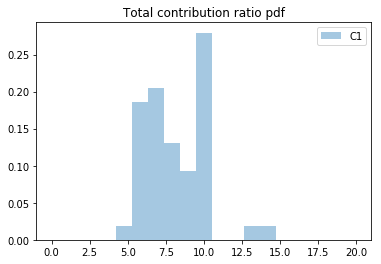

In [62]:
bins = np.linspace(0, 20, 20)

plt.hist(clust1['contr_total'], bins, alpha=0.4,density = True, label='C1')
#plt.hist(categ_hom['contr/budget'], bins, alpha=0.4,density = True, label='Homogeneous')
#plt.hist(categ_het['contr/budget'], bins, alpha=0.4,density = True, label='Heterogeneous')
plt.legend(loc='upper right')
plt.title('Total contribution ratio pdf')
plt.show()